# Project: Machine Learning to Predict Probability of a Heart Disease

## Introduction

Heart disease is not just the number one cause of death in Malaysia, it was also the number one cause of death worldwide. It affects both male and female. Everyone knows someone who had a heart issue. Lots of research had been invested into the possible causes of a heart disease. Machine learning could contribute in helping to reduce this number one killer.

This project will take the dataset, train them using machine learning algorithm and predict the probability of a patient having a heart disease. A label has been given in the dataset:-
* 0: Heart disease is not present
* 1: Heart disease present

In [1]:
#import the modules that will be used

%matplotlib inline


from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data

# for training our model
train_values = pd.read_csv('train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')

#for testing the model
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

## Data Information

This dataset is provided courtesy of Cleveland Heart Disease Database from a competition organised by drivendata. The dataset collects various measurements on health and cardiovascular statistics. Patient's identities are anonymous. 

Dataset downnload: [drivendata](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/)

In [3]:
# Check for training data length

len(train_values)

180

In [4]:
# Check for testing data length

len (test_values)

90

The dataset has been split into training data and test data. Training data has 180 values, while the test data has 90 values. There are 14 columns in the training dataset, where patient_id serves as an identifier. Below are the attributes information  and type of the remaining 13 columns. 

From: [drivendata](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/109/)

Attribute Information: 
------------------------ 
1. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
2. thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
3. resting_blood_pressure (type: int): resting blood pressure
4. chest_pain_type (type: int): chest pain type (4 values)
5. num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
6. fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
7. resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
8. serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
9. oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
10. sex (type: binary): 0: female, 1: male
11. age (type: int): age in years
12. max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
13. exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

--*labels: 1: Heart disease present. 0: Heart disease is not present
There are no missing values in this dataset. 

In [5]:
#Describe the data

display(train_values.describe())

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


The maximum value for serum_cholesterol_mg_per_dl is 564.000000. I didn't know if this is an actual outlier. 

In [6]:
#finding the outlier

train_values[train_values.serum_cholesterol_mg_per_dl == 564.000000]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
rv6siv,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0


The cholesterol level is on high end, especially any value exceeded 240mg/dl is considered ['very high'](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean). However, the highest cholesterol level ever recorded is 3165 mg/dl, [Guiness Book of Record](http://www.guinnessworldrecords.com/world-records/highest-triglyceride-level/), and that value is definitely an outlier. With this information, I shall keep this outlier in the dataset. 

### Feature Engineering

I would like to create a attribute called age-range. But before that, I would like an overview of the age distribution for train_values dataset

Text(0,0.5,'Frequency')

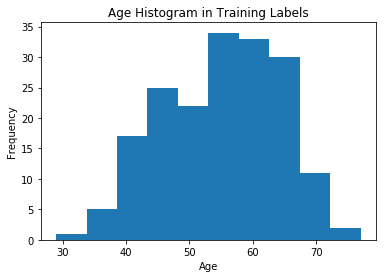

In [7]:
#histogram on age

plt.hist(train_values['age'])
plt.title("Age Histogram in Training Labels")
plt.xlabel("Age")
plt.ylabel("Frequency")

Majority of the age range falls around 50 to 70.  29 is the youngest age found in this dataset while 77 is the oldest. This new attribute will group the age as per below:-

* 21 to 40
* 41 to 60
* 61 to 80


In [8]:
train_values.head(20)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1


In [9]:
test_values.head(10)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
kev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0
9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0
jxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0
51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0


In [10]:
# Create new column called agerange in train_values

agelist =[]

for age in train_values['age']:
    if (21 <= age) & (age<= 40):
        agelist.append('21-40')
        
    if (41 <= age <= 60):
        agelist.append('41-60')
        
    if (61 <= age <= 80):
        agelist.append('61-80')
        
train_values['agerange']=agelist


In [11]:
# Create new column called agerange in test_values

agelist =[]

for age in test_values['age']:
    if (21 <= age) & (age<= 40):
        agelist.append('21-40')
        
    if (41 <= age <= 60):
        agelist.append('41-60')
        
    if (61 <= age <= 80):
        agelist.append('61-80')
        
test_values['agerange']=agelist

In [12]:
train_values.head(20)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,agerange
patient_id,,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,41-60
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,41-60
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,61-80
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,21-40
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,41-60
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,41-60
2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,41-60
daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,41-60
3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,41-60


In [13]:
# One-hot encode the features agerange and thal data using pandas.get_dummies()
train_values_final = pd.get_dummies(train_values, columns=['thal','agerange'])

# Encode thal and agerange data to numerical values
#new_thal = thal.replace({'normal': 0, 'fixed_defect': 1, 'reversible_defect':2})
#new_age = agerange.replace({'21 to 40': 0, '41 to 60': 1, '61 to 80':2})

# Print the number of features after one-hot encoding
encoded = list(train_values_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

18 total features after one-hot encoding.
['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect', 'agerange_21-40', 'agerange_41-60', 'agerange_61-80']


In [14]:
train_values_final.tail(20)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,agerange_21-40,agerange_41-60,agerange_61-80
patient_id,,,,,,,,,,,,,,,,,,
dtljkq,1,130,2,0,0,0,266,0.6,1,49,171,0,0,1,0,0,1,0
a2kf1z,1,117,4,2,1,0,230,1.4,1,60,160,1,0,0,1,0,1,0
usnkhx,3,160,4,3,0,2,164,6.2,0,62,145,0,0,0,1,0,0,1
hltlsl,2,142,4,3,0,2,309,0.0,1,45,147,1,0,0,1,0,1,0
l0c19s,1,142,4,0,0,2,226,0.0,1,53,111,1,0,0,1,0,1,0
lcexsf,1,152,3,1,0,0,277,0.0,0,67,172,0,0,1,0,0,0,1
y3m2bd,1,132,4,0,0,0,207,0.0,1,57,168,1,0,0,1,0,1,0
qcjf51,1,120,4,0,0,2,249,0.8,1,46,144,0,0,0,1,0,1,0
7zbya5,3,145,1,0,1,2,233,2.3,1,63,150,0,1,0,0,0,0,1


In [15]:
# do the same encoding with test_values

# One-hot encode the features agerange and thal data using pandas.get_dummies()
test_values_final = pd.get_dummies(test_values, columns=['thal','agerange'])

# Encode thal and agerange data to numerical values
#new_thal = thal.replace({'normal': 0, 'fixed_defect': 1, 'reversible_defect':2})
#new_age = agerange.replace({'21 to 40': 0, '41 to 60': 1, '61 to 80':2})

# Print the number of features after one-hot encoding
encoded_test = list(train_values_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded_test)

18 total features after one-hot encoding.
['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'thal_fixed_defect', 'thal_normal', 'thal_reversible_defect', 'agerange_21-40', 'agerange_41-60', 'agerange_61-80']


### Feature Scaling

Feature Scaling needs to be done as some features (resting_blood_pressure, max_heart_rate_achieved) have a three digits value and this may have a bigger a influence in the result compared to features that do not have a huge values like them.

MinMax Scaler is being used here as this algorithm shrink the range to a value between 0 and 1, so we have a pretty standard values for all the features. 

In [16]:
#feature scaling 

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
features_train = scaler.fit_transform(train_values_final)
features_test = scaler.fit_transform(test_values_final)

In [17]:
#heatmap, cos I'm finding correlation before deciding on the features
#first, need to join the train_labels with train_values

import seaborn as sns

overall=train_values_final.join(train_labels)
overall.head()


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,agerange_21-40,agerange_41-60,agerange_61-80,heart_disease_present
patient_id,,,,,,,,,,,,,,,,,,,
0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0,0,1,0,0
ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0,0,1,0,0
yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0,0,0,1,1
l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1,1,0,0,1
oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1,0,1,0,0


In [18]:
corr=overall.corr()

display(corr)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,agerange_21-40,agerange_41-60,agerange_61-80,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.157263,-0.305492,0.243341,-0.077045,-0.052659,0.095793,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.127950,-0.098964,0.046578,-0.068941,-0.144424,0.187908,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,-0.007042,-0.300914,0.307524,-0.067190,0.011850,0.022865,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,-0.015493,-0.185283,0.194026,-0.183282,-0.138740,0.242028,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.125474,-0.023938,-0.028324,-0.111806,-0.021748,0.081597,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.043308,0.023521,-0.041946,-0.082669,0.037290,0.004283,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,-0.090092,0.021710,0.015760,-0.120142,-0.153982,0.224853,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.055930,-0.332991,0.313616,-0.008504,-0.061858,0.069433,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.144932,-0.421950,0.366381,0.071252,0.177716,-0.224086,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.070984,-0.049719,0.020593,-0.490640,-0.471392,0.752912,0.138255


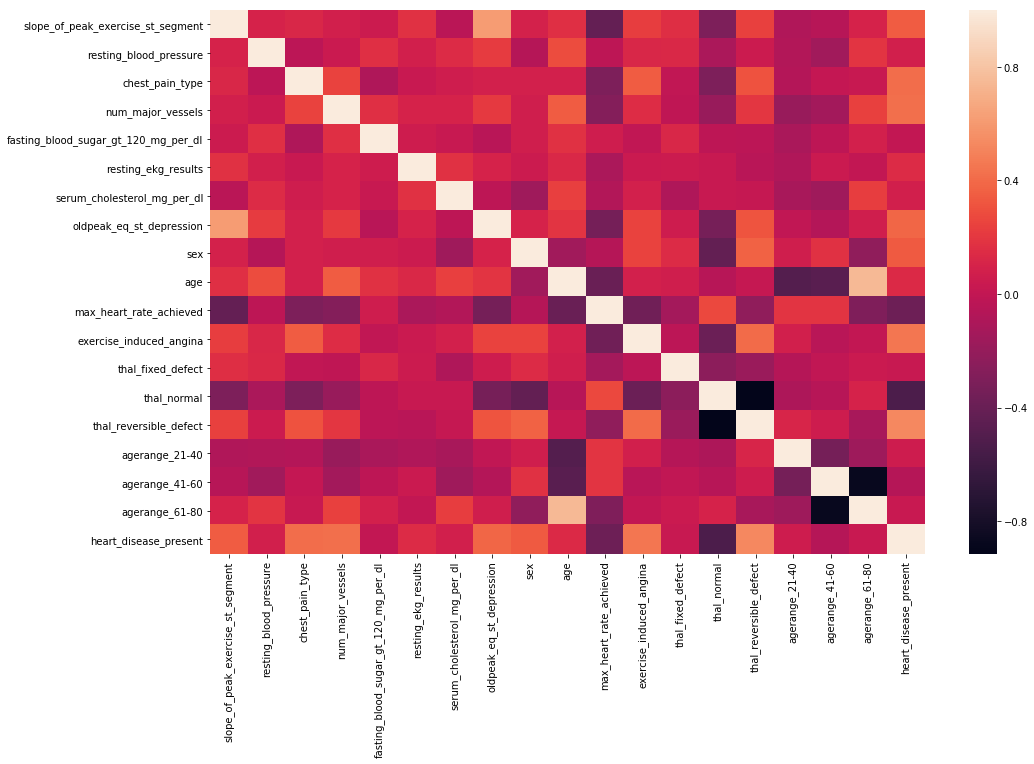

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

From the heatmap above, we can see some featurs have a strong correlation with each other(eg; thal_normal and thal_reversible_defect has a strong negative correlation, while slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression has a pretty strong positive correlation). Some moderate correlations also present in this heatmap (eg; thal_reversible_defect and exercise_induced_angina that has a moderate positive correlation). 

The heatmap tells us that the features are not independent of one another, as some featurs are strongly correlated. 

In [20]:
#get correlation to heart_disease_present

def get_corr(feature):

    return overall[feature].corr(overall['heart_disease_present'])

for feature in overall:
    print ('Correlation', feature,':', get_corr(feature))

Correlation slope_of_peak_exercise_st_segment : 0.344223986923
Correlation resting_blood_pressure : 0.0785057354407
Correlation chest_pain_type : 0.412828625366
Correlation num_major_vessels : 0.421518626048
Correlation fasting_blood_sugar_gt_120_mg_per_dl : 0.0033790726529
Correlation resting_ekg_results : 0.145933394351
Correlation serum_cholesterol_mg_per_dl : 0.0797748513149
Correlation oldpeak_eq_st_depression : 0.382930227959
Correlation sex : 0.335420930266
Correlation age : 0.138254706651
Correlation max_heart_rate_achieved : -0.375351869368
Correlation exercise_induced_angina : 0.448646516812
Correlation thal_fixed_defect : 0.0241121411085
Correlation thal_normal : -0.528811509654
Correlation thal_reversible_defect : 0.525145374593
Correlation agerange_21-40 : 0.0518615278818
Correlation agerange_41-60 : -0.0596889386449
Correlation agerange_61-80 : 0.0354314200906
Correlation heart_disease_present : 1.0


Below are the Top 5 features with the highest Pearson's correlation score:-

* thal_normal : -0.528811509654
* thal_reversible_defect : 0.525145374593
* exercise_induced_angina : 0.448646516812
* num_major_vessels : 0.421518626048
* chest_pain_type : 0.412828625366

There is a correlation between these five features with heart_disease_present feature, however, looking at the scores, the correlation isn't that strong. 

In [21]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features_train' and 'train_labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_train, 
                                                    train_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 144 samples.
Testing set has 36 samples.


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Although the dataset has been split into training and testing, I still want to further split the training set into training and testing set. This is because I do not want the algorithm to 'see' the data first. This will reduce the possibility of overfitting. 

In [22]:
# classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

# import metrics
from sklearn.metrics import log_loss


In [23]:

def gauss_(features_train,labels_train, features_test, labels_test):
    
    clf_Gauss = GaussianNB()
    clf_Gauss.fit(features_train, labels_train)
    pred=clf_Gauss.predict_proba(features_test)

    #print 'precision score Gaussian', precision_score(labels_test, pred)
    #print 'recall score Gaussian', recall_score(labels_test, pred)
    print ('log_loss score for Gauss', log_loss(labels_test, pred))
    
    return clf_Gauss

gauss_(X_train, y_train, X_test, y_test)

log_loss score for Gauss 1.41284755558


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [24]:
def dt_(features_train,labels_train, features_test, labels_test):
    
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(features_train, labels_train)
    pred=clf_dt.predict_proba(features_test)

    print ('log_loss score for Decision Tree with no parameter tuning:', log_loss(labels_test, pred))


dt_(X_train, y_train, X_test, y_test)    

log_loss score for Decision Tree with no parameter tuning: 12.4723359204


In [25]:
def knn_(features_train,labels_train, features_test, labels_test):
    
    clf_knn = KNeighborsClassifier() 
    clf_knn.fit(features_train, labels_train)
    pred=clf_knn.predict_proba(features_test)

    print ('log_loss score for KNN with no parameter tuning:', log_loss(labels_test, pred))


knn_(X_train, y_train, X_test, y_test)  

log_loss score for KNN with no parameter tuning: 1.26710858796


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [26]:
def lr_(features_train,labels_train, features_test, labels_test):
    
    clf_lr = LogisticRegression() 
    clf_lr.fit(features_train, labels_train)
    pred=clf_lr.predict_proba(features_test)

    print ('log_loss score for Logistic Regression with no parameter tuning:', log_loss(labels_test, pred))

lr_(X_train, y_train, X_test, y_test)  

log_loss score for Logistic Regression with no parameter tuning: 0.393955341314


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


So far, the best score comes from Logistic Regression at 0.394


In [27]:
def adb_(features_train,labels_train, features_test, labels_test):
    
    clf_adb = AdaBoostClassifier()
    clf_adb.fit(features_train, labels_train)
    pred=clf_adb.predict_proba(features_test)

    print ('log_loss score for Adaboost with no parameter tuning:', log_loss(labels_test, pred))


adb_(X_train, y_train, X_test, y_test)  

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


log_loss score for Adaboost with no parameter tuning: 0.64499836175


In [28]:
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier() 
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('knn', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)

pred=eclf1.predict_proba(X_test)

print ('log_loss score for Voting Classifier with no parameter tuning:', log_loss(y_test, pred))

log_loss score for Voting Classifier with no parameter tuning: 0.420223293515


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Base results for all the classifiers

Log-loss base score for all the classifiers as below:-
* Gaussian Naive Bayes : 1.41
* Decision Tree: 10.55
* K-Nearest Neighbors: 1.27
* Logistic Regression: 0.39
* Adaboost:  0.645
* Stacking: 0.44

Amongst them, Logistic Regression and Stacking algorith performs better than the benchmark of 0.5381. The benchmark is also using Logistic Regression, so it is surprising how this model could perform better than the benckmark although they are using the same algorithm.

In [29]:
#Parameters tuning with GridSearch CV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


def get_bestclf(clf, parameters):
    grid_obj = GridSearchCV(clf, scoring= make_scorer(log_loss), param_grid=parameters)
    grid_fit = grid_obj.fit(X_train, y_train)
    best_clf = grid_fit.best_estimator_
    return best_clf

In [30]:
#GaussianNB() no need to set parameters
# Below is the Decision Tree after parameters tuning

best_DT= get_bestclf(DecisionTreeClassifier(), parameters = {'criterion':['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5]})
best_predictions = best_DT.predict_proba(X_test)
print ('Score for Decision Tree after Parameters tuning:', log_loss(y_test, best_predictions))

Score for Decision Tree after Parameters tuning: 6.88407626532


In [31]:
# Parameters tuning for KNN

best_KNN= get_bestclf(KNeighborsClassifier(), parameters = {'n_neighbors':[2,4,5,6,8], 'weights': ['uniform', 'distance'],
                                                            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']})
best_predictions = best_KNN.predict_proba(X_test)
print ('Score for KNN after Parameters tuning:', log_loss(y_test, best_predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

Score for KNN after Parameters tuning: 2.18114830095


In [32]:
#Parameters tuning for Logistic Regression

best_lr= get_bestclf(LogisticRegression(), parameters = {'C':[0.1, 0.5, 1.0, 1.5, 2.0], 'tol': [0.1, 0.01, 1.0, 0.5],
                                                            'solver': ['liblinear']})
best_predictions = best_lr.predict_proba(X_test)
print ('Score for Logistic Regression after Parameters tuning:', log_loss(y_test, best_predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Score for Logistic Regression after Parameters tuning: 0.409102334537


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [33]:
# Parameters tuning for Adaboost

best_adb= get_bestclf(AdaBoostClassifier(), parameters = {'n_estimators': [10, 50, 100, 250, 500, 1000], 
                                                          'learning_rate': [0.001, 0.1,1, 2.0],
                                                          'algorithm': ['SAMME', 'SAMME.R']})
best_predictions = best_adb.predict_proba(X_test)
print ('Score for AdaBoost after Parameters tuning:', log_loss(y_test, best_predictions))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Score for AdaBoost after Parameters tuning: 0.692730947712


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# stacking parameters

#eclf_best = VotingClassifier(estimators=[
#         ('best_lr', best_lr), ('best_adb', best_adb), ('best_KNN', best_KNN), ('best_DT', best_DT)], voting='soft')

eclf_best = VotingClassifier(estimators=[
         ('best_lr', best_lr), ('best_adb', best_adb), ('gnb', clf3)], voting='soft')

best_stack = eclf_best.fit(X_train, y_train)

best_predictions=best_stack.predict_proba(X_test)
print ('Score for Best Stacking after Parameters tuning:', log_loss(y_test, best_predictions))

Score for Best Stacking after Parameters tuning: 0.477204902594


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Log-loss score after parameters tuning (with the exception of Gaussian Naive Bayes) for all the classifiers as below:-
* Gaussian Naive Bayes : 1.41
* Decision Tree: 9.59
* K-Nearest Neighbors: 2.18
* Logistic Regression: 0.41
* Adaboost:  0.693
* Stacking: 0.436

Amongst the algorithm above, Decision Tree and Stacking method has improved slightly using GridSearchCV, while the rest actually performed worse than when parameters were not tuned in. 

In [35]:
# Feature Importance

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

print (importances)
# Plot
#vs.feature_plot(importances, X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.02  0.04  0.04  0.04  0.02  0.02  0.14  0.14  0.06  0.22  0.18  0.04
  0.    0.02  0.02  0.    0.    0.  ]


In [36]:
def get_best_features(clf):
    model = clf.fit(X_train, y_train)
    
    importances = model.feature_importances_ 
    
    
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(train_values_final.columns, model.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    sorted_feats = sorted((v,k) for k,v in feats.items())

    print (sorted_feats)    
    return sorted_feats

In [37]:

clf1 = DecisionTreeClassifier()
clf2 = AdaBoostClassifier()

print ('Feature importances for DecisionTreeClassifier:')
print (get_best_features(clf1))
print ('Feature importances for AdaBoostClassifier :')
print (get_best_features(clf2))

Feature importances for DecisionTreeClassifier:
[(0.0, 'agerange_21-40'), (0.0, 'agerange_41-60'), (0.0, 'agerange_61-80'), (0.0, 'exercise_induced_angina'), (0.0, 'fasting_blood_sugar_gt_120_mg_per_dl'), (0.0, 'resting_ekg_results'), (0.0, 'thal_fixed_defect'), (0.0, 'thal_reversible_defect'), (0.0085139318885449032, 'resting_blood_pressure'), (0.021229544449358696, 'sex'), (0.027863777089783284, 'slope_of_peak_exercise_st_segment'), (0.037151702786377715, 'num_major_vessels'), (0.061359045105175113, 'serum_cholesterol_mg_per_dl'), (0.071649712516585584, 'max_heart_rate_achieved'), (0.097543114391926991, 'chest_pain_type'), (0.14937123453014814, 'age'), (0.23409428845290634, 'oldpeak_eq_st_depression'), (0.29122364878919332, 'thal_normal')]
[(0.0, 'agerange_21-40'), (0.0, 'agerange_41-60'), (0.0, 'agerange_61-80'), (0.0, 'exercise_induced_angina'), (0.0, 'fasting_blood_sugar_gt_120_mg_per_dl'), (0.0, 'resting_ekg_results'), (0.0, 'thal_fixed_defect'), (0.0, 'thal_reversible_defect'), 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



The top 5 features ranked by features_importances for Decision Tree are:-
thal_normal: 0.29
oldpeak_eq_st_depression: 0.164
age: 0.153
chest_pain_type: 0.098
serum_cholesterol_mg_per_dl: 0.08

The top 5 features ranked by features_importances for Adaboost are:-

age: 0.22
max_heart_rate_achieved: 0.18
serum_cholesterol_mg_per_dl: 0.14
oldpeak_eq_st_depression: 0.14
sex: 0.06

This is different from the corr values we've gotten previously:-
thal_normal : -0.528811509654
thal_reversible_defect : 0.525145374593
exercise_induced_angina : 0.448646516812
num_major_vessels : 0.421518626048
chest_pain_type : 0.412828625366

In [44]:
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [45]:
features_train_reduced = features_train[features_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
features_test_reduced = features_test[features_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [42]:
train_reduced = train_values_final[train_values_final.columns.values[[(np.argsort(importances)[::-1])[:5]]]]
print (train_values_reduced).head(5)

# it print out the adaboost classifier

            age  max_heart_rate_achieved  serum_cholesterol_mg_per_dl  \
patient_id                                                              
0z64un       45                      170                          308   
ryoo3j       54                      158                          214   
yt1s1x       77                      162                          304   
l2xjde       40                      181                          223   
oyt4ek       59                      145                          270   
ldukkw       42                      150                          180   
2gbyh9       60                      157                          258   
daa9kp       57                      112                          276   
3nwy2n       59                      140                          326   
1r508r       50                      158                          219   
ldg4b9       66                      151                          302   
xc17yq       42                      178           

AttributeError: 'NoneType' object has no attribute 'head'

In [53]:
for i in X_train:
    print (i)
#print (X_train[features])

[ 0.          0.41860465  0.66666667  0.          0.          0.
  0.24429224  0.06451613  1.          0.3125      0.78301887  1.          0.
  1.          0.          0.          1.          0.        ]
[ 0.5         0.39534884  1.          0.66666667  0.          1.
  0.30365297  0.48387097  1.          0.60416667  0.32075472  1.          0.
  0.          1.          0.          1.          0.        ]
[ 0.          0.34883721  0.33333333  0.          0.          0.
  0.30821918  0.0483871   1.          0.58333333  0.4245283   0.          0.
  0.          1.          0.          1.          0.        ]
[ 0.5         0.55813953  1.          1.          0.          1.
  0.41780822  0.          1.          0.33333333  0.48113208  1.          0.
  0.          1.          0.          1.          0.        ]
[ 0.          0.41860465  0.66666667  1.          1.          1.          0.2739726
  0.          1.          0.5         0.72641509  0.          0.          1.
  0.          0.       

In [56]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k='all').fit(X_train,y_train)
x_new = selector.transform(X_test) # not needed to get the score
scores_skb = selector.scores_

print (scores_skb)

#X_train, X_test, y_train, y_test 

[  6.02770083   0.08662046   3.18246421   9.16038709   0.10414861
   1.25875208   0.09558938   3.67244935   5.07767526   0.25861585
   1.68981738  18.44525753   0.32755418  18.92953717  23.30154799
   0.25077399   0.17150342   0.13622291]


In [83]:
model_lr=LogisticRegression()
rfe = RFE(model_lr, 5)
fit = rfe.fit(X_train, y_train)

col_list=[]
print (fit.n_features_)
print (fit.support_)
    
for bool, feature in zip(fit.support_, train_values_final.columns):
    print (bool, feature)
    if bool:
        col_list.append(feature)

print (col_list)

5
[ True False False  True False False False  True False False False  True
 False  True False False False False]
True slope_of_peak_exercise_st_segment
False resting_blood_pressure
False chest_pain_type
True num_major_vessels
False fasting_blood_sugar_gt_120_mg_per_dl
False resting_ekg_results
False serum_cholesterol_mg_per_dl
True oldpeak_eq_st_depression
False sex
False age
False max_heart_rate_achieved
True exercise_induced_angina
False thal_fixed_defect
True thal_normal
False thal_reversible_defect
False agerange_21-40
False agerange_41-60
False agerange_61-80
['slope_of_peak_exercise_st_segment', 'num_major_vessels', 'oldpeak_eq_st_depression', 'exercise_induced_angina', 'thal_normal']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
print (features_train)

[[ 0.          0.39534884  0.33333333 ...,  0.          1.          0.        ]
 [ 0.5         0.18604651  0.66666667 ...,  0.          1.          0.        ]
 [ 0.          0.36046512  1.         ...,  0.          0.          1.        ]
 ..., 
 [ 0.5         0.36046512  0.66666667 ...,  0.          0.          1.        ]
 [ 0.          0.34883721  0.66666667 ...,  0.          1.          0.        ]
 [ 0.          0.76744186  0.66666667 ...,  0.          1.          0.        ]]


In [101]:
reduced_features_trains = train_values_final[col_list]
reduced_features_test = test_values_final[col_list]

print (reduced_features_trains)

            slope_of_peak_exercise_st_segment  num_major_vessels  \
patient_id                                                         
0z64un                                      1                  0   
ryoo3j                                      2                  0   
yt1s1x                                      1                  3   
l2xjde                                      1                  0   
oyt4ek                                      3                  0   
ldukkw                                      1                  0   
2gbyh9                                      2                  2   
daa9kp                                      2                  1   
3nwy2n                                      3                  0   
1r508r                                      2                  0   
ldg4b9                                      2                  0   
xc17yq                                      1                  0   
mpggsq                                      1   

In [102]:
# minmax scaler again

scaler = preprocessing.MinMaxScaler()
features_train = scaler.fit_transform(train_values_final)
features_test = scaler.fit_transform(test_values_final)

In [103]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(features_train, 
                                                    train_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 144 samples.
Testing set has 36 samples.


In [104]:
# gaussian nb with reduced data

gauss_(X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

ValueError: bad input shape (36, 18)

In [94]:
#dt with reduced data

dt_(X_train, y_train, X_test, y_test) 

log_loss score for Decision Tree with no parameter tuning: 15.3505672866


In [95]:
#knn with reduced data

knn_(X_train, y_train, X_test, y_test) 

log_loss score for KNN with no parameter tuning: 1.26710858796


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [96]:
#logisticregression with reduced data

lr_(X_train, y_train, X_test, y_test) 

log_loss score for Logistic Regression with no parameter tuning: 0.393955341314


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X_train)
# summarize components
print("Explained Variance: %s",  fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: %s [ 0.26963754  0.2002297   0.11728868]
[[ 0.11249734 -0.00527823  0.16024216  0.08678522 -0.01261981 -0.05335934
  -0.00474093  0.07073169  0.35057158 -0.02121074 -0.06914795  0.30678767
   0.00947502 -0.58980137  0.58032634  0.03120142  0.121568   -0.15276943]
 [ 0.09041725  0.04537025  0.08037813  0.17062808  0.02822474 -0.02637747
   0.03228893  0.03986752 -0.08483559  0.2042798  -0.15049536  0.19646026
   0.00869018 -0.08748767  0.07879749  0.01896212 -0.65190478  0.63294266]
 [-0.13595922 -0.02650109 -0.10634395 -0.12390065 -0.14262781 -0.90834987
  -0.03283524 -0.03595843 -0.11261535 -0.08352606  0.07687955 -0.17903649
  -0.02837018 -0.07152961  0.09989979  0.13692946 -0.11688917 -0.02004029]]


In [79]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=5).fit(X_train)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(X_train)

# TODO: Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3',
                                                    'Dimension 4','Dimension 5'])

print (reduced_data)

     Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5
0      -0.151314    -0.549372     0.314838     0.700663     0.721709
1       1.188255    -0.076981    -0.684423     0.377794    -0.026895
2       0.676580    -0.498808     0.650900    -0.381650    -0.252101
3       1.176212    -0.107786    -0.681435     0.297915     0.006360
4      -0.442063    -0.528150    -0.699671    -0.708137     0.657547
5      -0.833507     0.659637    -0.360123    -0.357766    -0.124418
6      -0.428252    -0.715264    -0.493068     0.022196    -0.033597
7       0.481382     0.904840     0.655701    -0.581130    -0.302474
8      -1.089558     0.715391    -0.282246     0.082705    -0.568834
9      -0.388431    -0.574442    -0.730247    -0.407857     0.554085
10     -0.864646    -0.467342    -0.541561    -0.402772     0.200190
11     -0.648145     1.022203     0.358633     0.934553     0.246004
12      0.104525     0.950449     0.798684    -0.211950    -0.762997
13      0.835201     0.227790     

In [80]:
# try to push the reduced data into classifier

def lr_(features_train,labels_train, features_test, labels_test):
    
    clf_lr = LogisticRegression() 
    clf_lr.fit(features_train, labels_train)
    pred=clf_lr.predict_proba(features_test)

    print ('log_loss score for Logistic Regression with no parameter tuning:', log_loss(labels_test, pred))

lr_(reduced_data, y_train, X_test, y_test) 



C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 18 features per sample; expecting 5

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_values_final.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

sorted_feats = sorted((v,k) for k,v in feats.items())

print (sorted_feats)    
